# Module 9 - Logistic Map and the Route to Chaos

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Logistic_Bifurcation_map_High_Resolution.png/1920px-Logistic_Bifurcation_map_High_Resolution.png" width=600px>

## Goals

- Logistic map
- a simple route to chaotic behavior
- What does it take for a system to be chaotic?
- Can we predict ahead of time if a particular system will display chaotic behavior?

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Chaos 
Aperiodic time-asymptotic behavior in a deterministic system which exhibits sensitive dependence on initial conditions.

1. **Aperiodic time-asymptotic behavior:** the existence of phase-space trajectories which do not settle down to fixed points or periodic orbits. For practical reasons, we insist that these trajectories are not too rare. We also require the trajectories to be bounded: i.e., they should not go off to infinity.
2. **Deterministic:** the equations of motion of the system possess no random inputs. In other words, the irregular behavior of the system arises from non-linear dynamics and not from noisy driving forces.
3. **Sensitive dependence on initial conditions:** nearby trajectories in phase-space separate exponentially fast in time: i.e., the system has a positive Lyapunov exponent.

## The logistic map

$$ x_{n+1} = \mu x_n (1 - x_n) $$

* map $\to$ discrete equation of motion
* A very simple iterative map that has applications in: ecology, statistics, neural networks, medicine.
* Think of $x_n$ as the size of a population in generation $n$, while $\mu$ is the availability of resources.

A study of this simple system will give us a more complete understanding of the origin of period doubling.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Create a function, `def logistic_map(mu,N):` that takes as input the dimensionless growth parameter $\mu$ and the number of iterations, and returns an array, $x$, with the solution to the logistic map. Use this function to create plots for various values of $\mu = [0.5, 1.0, 1.5, 3.3, 3.45, 3.55, 3.8]$.
</div>

In [2]:
def logistic_map(μ, N):
    '''Return the iterative logistic map.'''
    x = np.zeros(N)
    x[0] = np.random.random()
    for n in range(x.size-1):
        x[n+1] = μ*x[n]*(1-x[n])
    return x

<IPython.core.display.Javascript object>


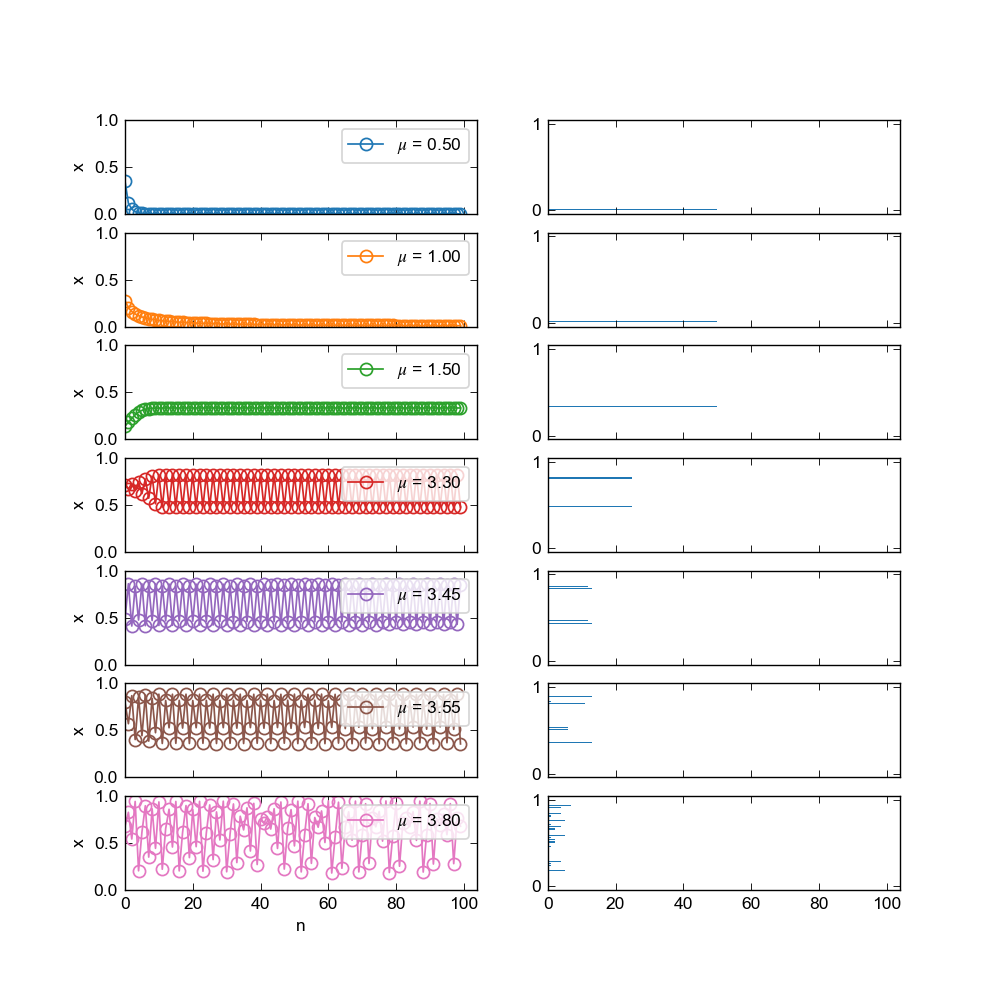

In [3]:
N = 100
μ = [0.5, 1.0, 1.5, 3.3, 3.45, 3.55, 3.8]
fig, axes = plt.subplots(len(μ),2,sharex=True, sharey=False, squeeze=False, figsize=(8,8))

for i in range(len(axes)):

    x = logistic_map(μ[i], N)
    
    axes[i][0].plot(np.arange(0,N),x,linestyle='-',marker='o',linewidth=1.0,markerfacecolor='None', 
            color=colors[i], markeredgecolor=colors[i], markersize=7, 
            label=r'$\mu$ = {0:3.2f}'.format(μ[i]))
    
    axes[i][1].hist(x[N//2:], orientation='horizontal', rwidth=0.5, range=(0,1), bins=40)
    
    axes[i][0].legend(loc='upper right', frameon=True)
    axes[i][0].set_ylabel('x')
    axes[i][0].set_ylim(0,1)

axes[-1,0].set_xlabel('n')

* For μ=1.5, we see simple convergent behavior.
* For μ=3.3, periodic behavior arises.
* For μ=3.8, non-periodic, chaotic behavior seems to occur.

Can understand the behavior for small $\mu$ by considering the continuous *Logistic function*: 
\begin{equation}
f(x,\mu) = \mu x (1-x).
\end{equation}
Then, for $\mu\sim 1$ $\exists$ a **fixed point** value $x^\ast$ such that:
\begin{equation}
f(x^\ast,\mu) = x^\ast.
\end{equation}

### Can we determine $x^\ast$?

\begin{align}
x^\ast &= \mu x^\ast (1-x^ast) \newline
x^\ast [ \mu x^\ast + 1 - \mu] &= 0 \newline
\Rightarrow x^\ast &= 0, 1-\frac{1}{\mu}.
\end{align}

We thus have two fixed points, corresponding to the two values of x*. Generically we can iteratively or graphically solve. 

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Find the stable points for the logistic function by plotting $f(x,\mu)$ vs $x_{n}$ and the straight line $x_n$ vs $x_{n}$ for $\mu = 1.5$ and $\mu = 3.3$.
</div>


<IPython.core.display.Javascript object>


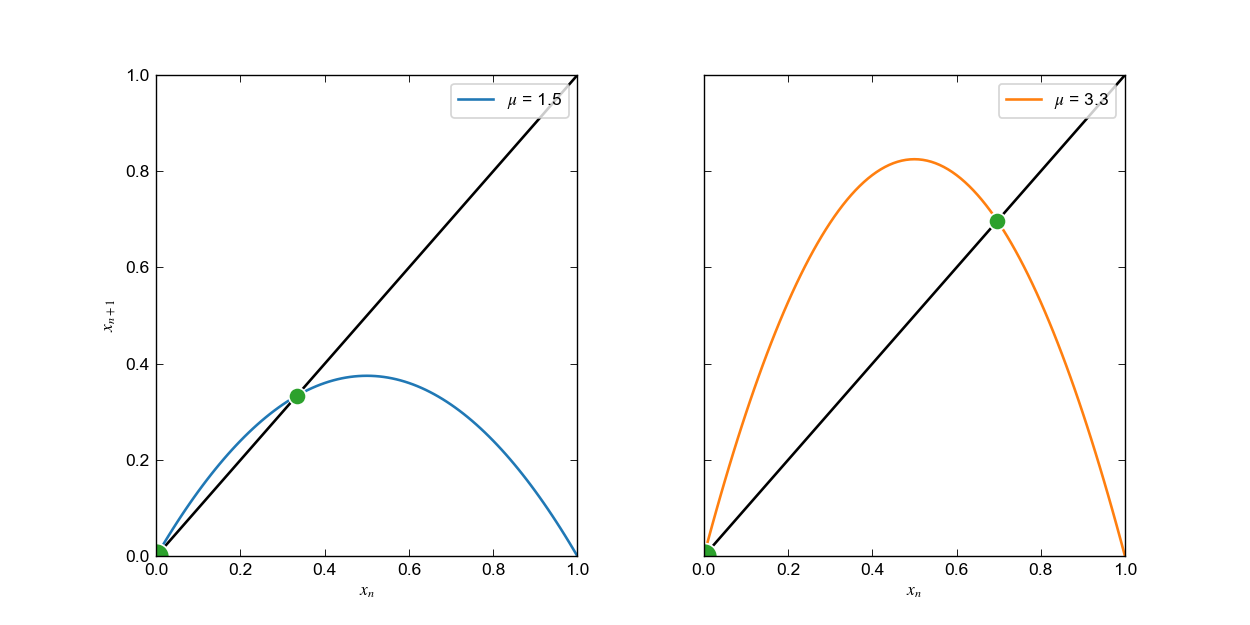

In [4]:
μ = [1.5,3.3]
x = np.arange(0,1.01,0.01)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
for i, ax in enumerate(axes.flat):
    
    # plot x
    ax.plot(x,x,color='k')
    
    # plot f(x,μ)
    ax.plot(x,μ[i]*x*(1-x),color=colors[i], label=r'$\mu$ = {0:3.1f}'.format(μ[i]))
    
    # plot the fixed point solutions
    ax.plot(0,0,'o',markersize=15, markerfacecolor=colors[2], markeredgecolor='w')
    ax.plot(1-1/μ[i],1-1/μ[i],'o',markersize=10, markerfacecolor=colors[2], markeredgecolor='w')
            
    ax.legend(loc='upper right', frameon=True)
    ax.set_xlabel(r'$x_n$')
    
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
axes[0,0].set_ylabel(r'$x_{n+1}$')

In order to understand the differences between these two maps, let us investigate the logistic function near the fixed points:

\begin{equation}
f(x^\ast + \delta x,\mu) \approx f(x^\ast,\mu) + \frac{d}{d x}f(x^\ast,\mu) \delta x.
\end{equation}

From this expansion, we can see that the **stability** of a fixed point is related to the magnitude of the first derivative of the $f$, i.e. 

\begin{align}
|f'(x^\ast,\mu)| < 1 &\Rightarrow \mathrm{ stable} \newline
|f'(x^\ast,\mu)| > 1 &\Rightarrow \mathrm{ unstable} .
\end{align}

We can check this explicitely:

\begin{align}
\frac{d}{dx} f(x,\mu) &= \frac{d}{d x} [ \mu x (1-x) ] \newline
&= \mu(1-x) - \mu x \newline
&= \mu(1-2x) .
\end{align}

Evaluating at the fixed points:

### 1. $x^\ast = 0$
\begin{equation}
f'(x^\ast = 0) = \mu
\end{equation}
which is stable for $\mu < 1$.

### 2. $x^\ast = 1-1/\mu$
\begin{align}
f'(x^\ast = 1-1/\mu) &= \mu(1-2 + 2/\mu) \newline
&= 2 -\mu
\end{align}
which is stable for:
\begin{align}
|2-\mu| &< 1 \newline 
-1 &> 2-\mu < 1 \newline 
1 &< \mu < 3 .
\end{align}



## Phase Space Plots
We can observe these instabilities directly on the map equivalent of a phase space

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.

<IPython.core.display.Javascript object>


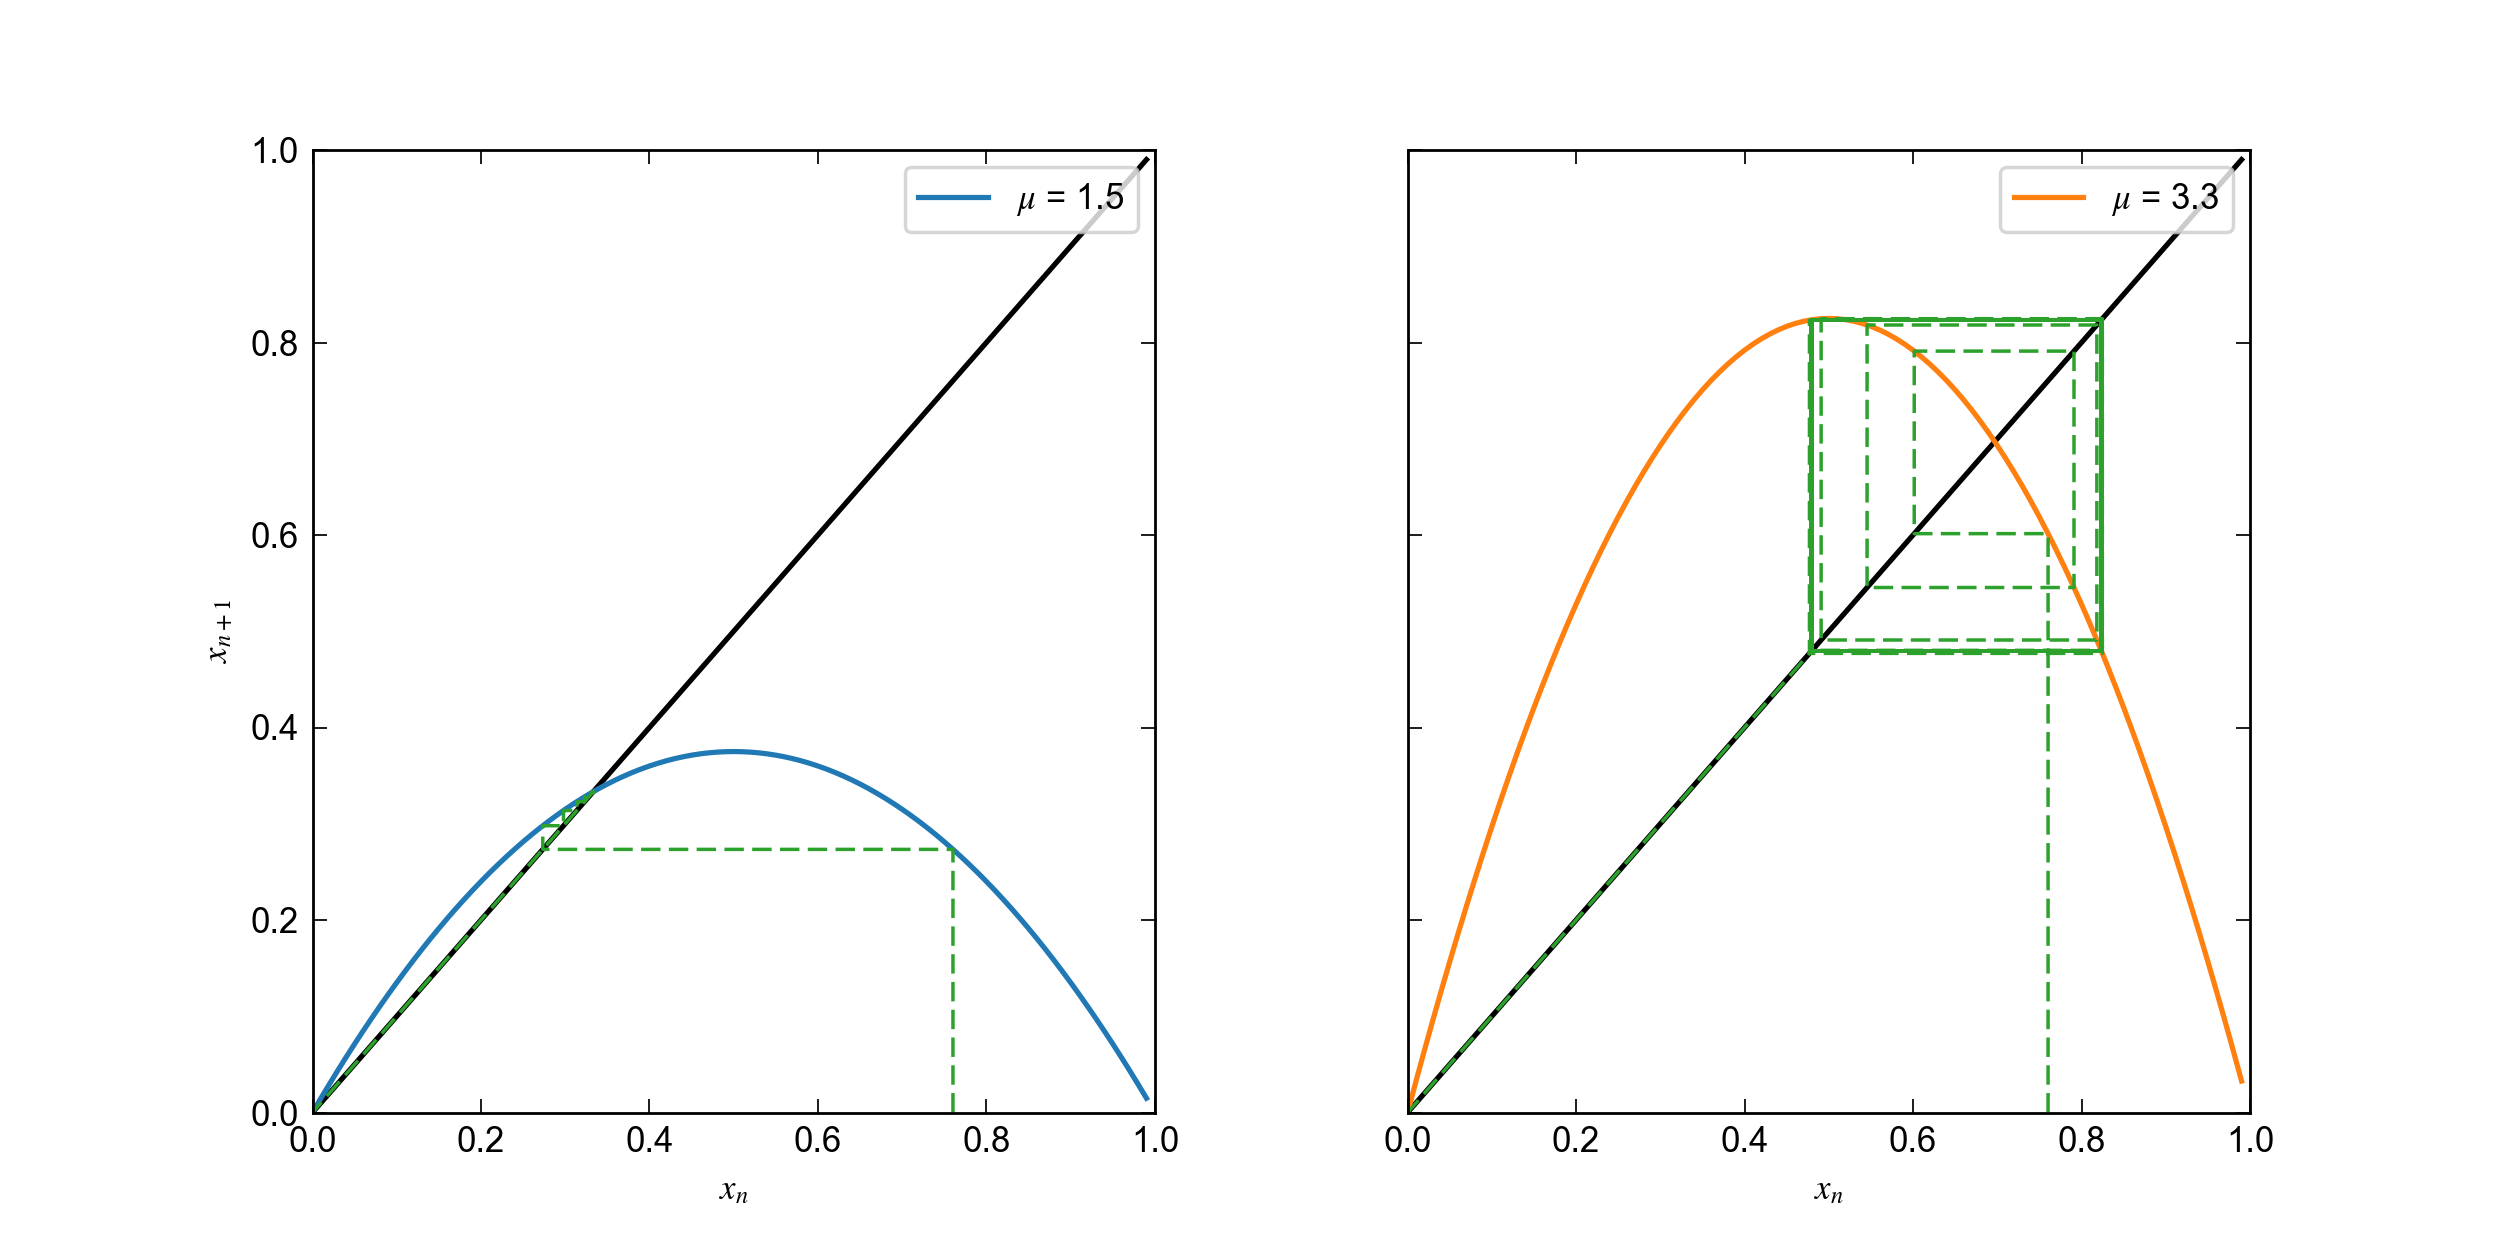

In [5]:
def logistic(mu,x):
    '''Return the logistic functon'''
    return mu*x*(1.0-x)

μ = [1.5,3.3]
x = np.arange(0,1,0.01)
xp = np.zeros([N,2])
xp[0,0] = np.random.random()
xp[0,1] = 0.0

fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
for i, ax in enumerate(axes.flat):

    # plot x
    ax.plot(x,x,color='k')

    # plot f(x,μ)
    ax.plot(x,μ[i]*x*(1-x),color=colors[i], label=r'$\mu$ = {0:3.1f}'.format(μ[i]))

    # compute the trajectories
    for n in range(1,N-1,2):
        xp[n,0] = xp[n-1,0]
        xp[n,1] = logistic(μ[i],xp[n-1,0])
        xp[n+1,0] = xp[n,1]
        xp[n+1,1] = xp[n,1]

    ax.plot(xp[:,0],xp[:,1],'--',color=colors[2],linewidth=1)

    # legend and labels
    ax.legend(loc='upper right', frameon=True)
    ax.set_xlabel(r'$x_n$')
    
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    
axes[0,0].set_ylabel(r'$x_{n+1}$')

The unstable fixed point shows evidence of oscillations.  Can understand this and its connection to period doubling by looking at the second iteratue of $f(x,\mu)$, i.e. how does $x_{n+2}$ depend on $x_n$

\begin{equation}
f^{(2)}(x,\mu) = f(f(x,\mu),\mu)
\end{equation}

or in terms of the Logistic map:

\begin{align}
x_{n+2} &= \mu x_{n+1}(1-x_{n+1}) \newline
&= \mu[\mu x_n(1-x_n)][1-\mu x_n(1-x_n)]
\end{align}

A fixed point solution of this equation exists, but is quite complicated.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Find the stable points for the second iterate of the logistic function by plotting $f_2(x,\mu)=f(f(x,\mu),\mu)$ vs $x_{n}$ and the straight line $x_n$ vs $x_{n}$ for $\mu = 1.5$ and $\mu = 3.3$.
Find a graphical solution to the second iterate of the Logistic map and plot for $\mu=1.5,3.3$.
</div>

<IPython.core.display.Javascript object>


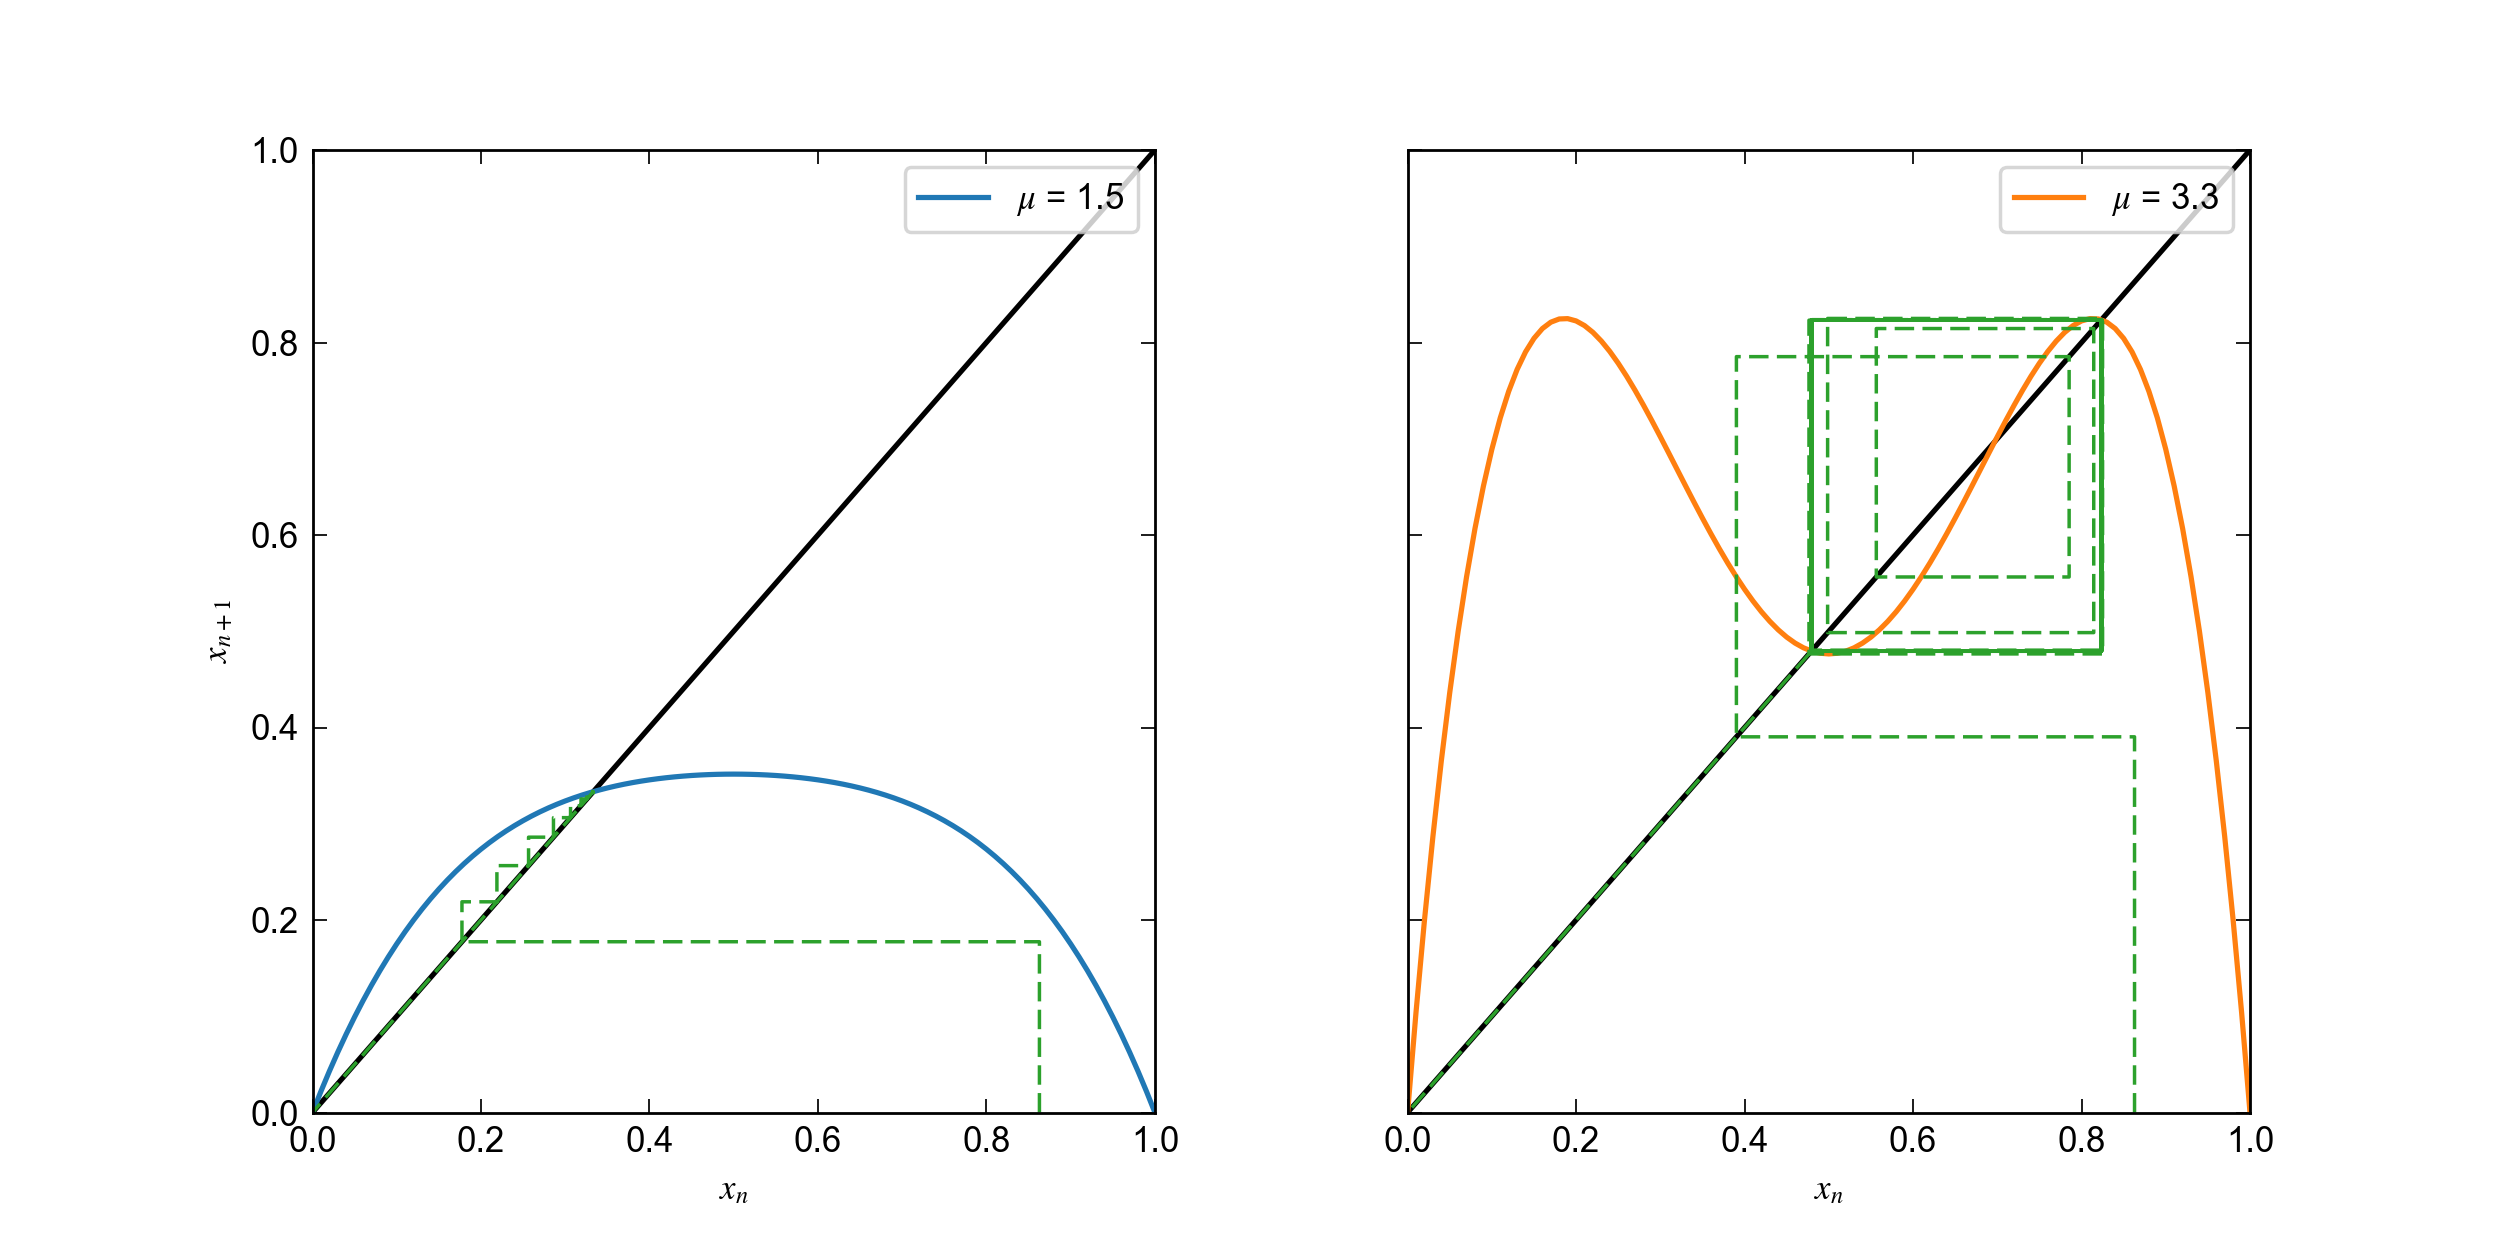

(0, 1)

In [6]:
μ = [1.5,3.3]
x = np.arange(0,1.01,0.01)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
xp = np.zeros([N,2])
xp[0,0] = np.random.random()
xp[0,1] = 0.0
for i, ax in enumerate(axes.flat):
    
    ax.plot(x,x,color='k')
    fx = μ[i]*x*(1-x)
    ax.plot(x,μ[i]*fx*(1-fx),color=colors[i], label=r'$\mu$ = {0:3.1f}'.format(μ[i]))

    # compute the trajectories
    for n in range(1,N-1,2):
        xp[n,0] = xp[n-1,0]
        xp[n,1] = logistic(μ[i],xp[n-1,0])
        xp[n+1,0] = xp[n,1]
        xp[n+1,1] = xp[n,1]

    ax.plot(xp[:,0],xp[:,1],'--',color=colors[2],linewidth=1)          
    ax.legend(loc='upper right', frameon=True)
    
axes[0,0].set_ylabel(r'$x_{n+1}$')
[axes[0,i].set_xlabel(r'$x_n$') for i in range(2)]
axes[0,0].set_ylim(0,1)
axes[0,0].set_xlim(0,1)

## Bifurcation diagram for the logistic map
We can use our simple logistic_map() function to generate a bifurcation diagram for the logistic map by plotting $x_n$ after some number of initial iterations at a given value of $\mu$.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Create a bifurcation diagram for the logistic map by iteratively solving the logistic map starting at $\mu=1$ and sweeping a range of values up to $\mu=4$. Run each map for 200 iterations and plot the last value of the population, `x[-1]` vs the value of $\mu$.
</div>

<IPython.core.display.Javascript object>


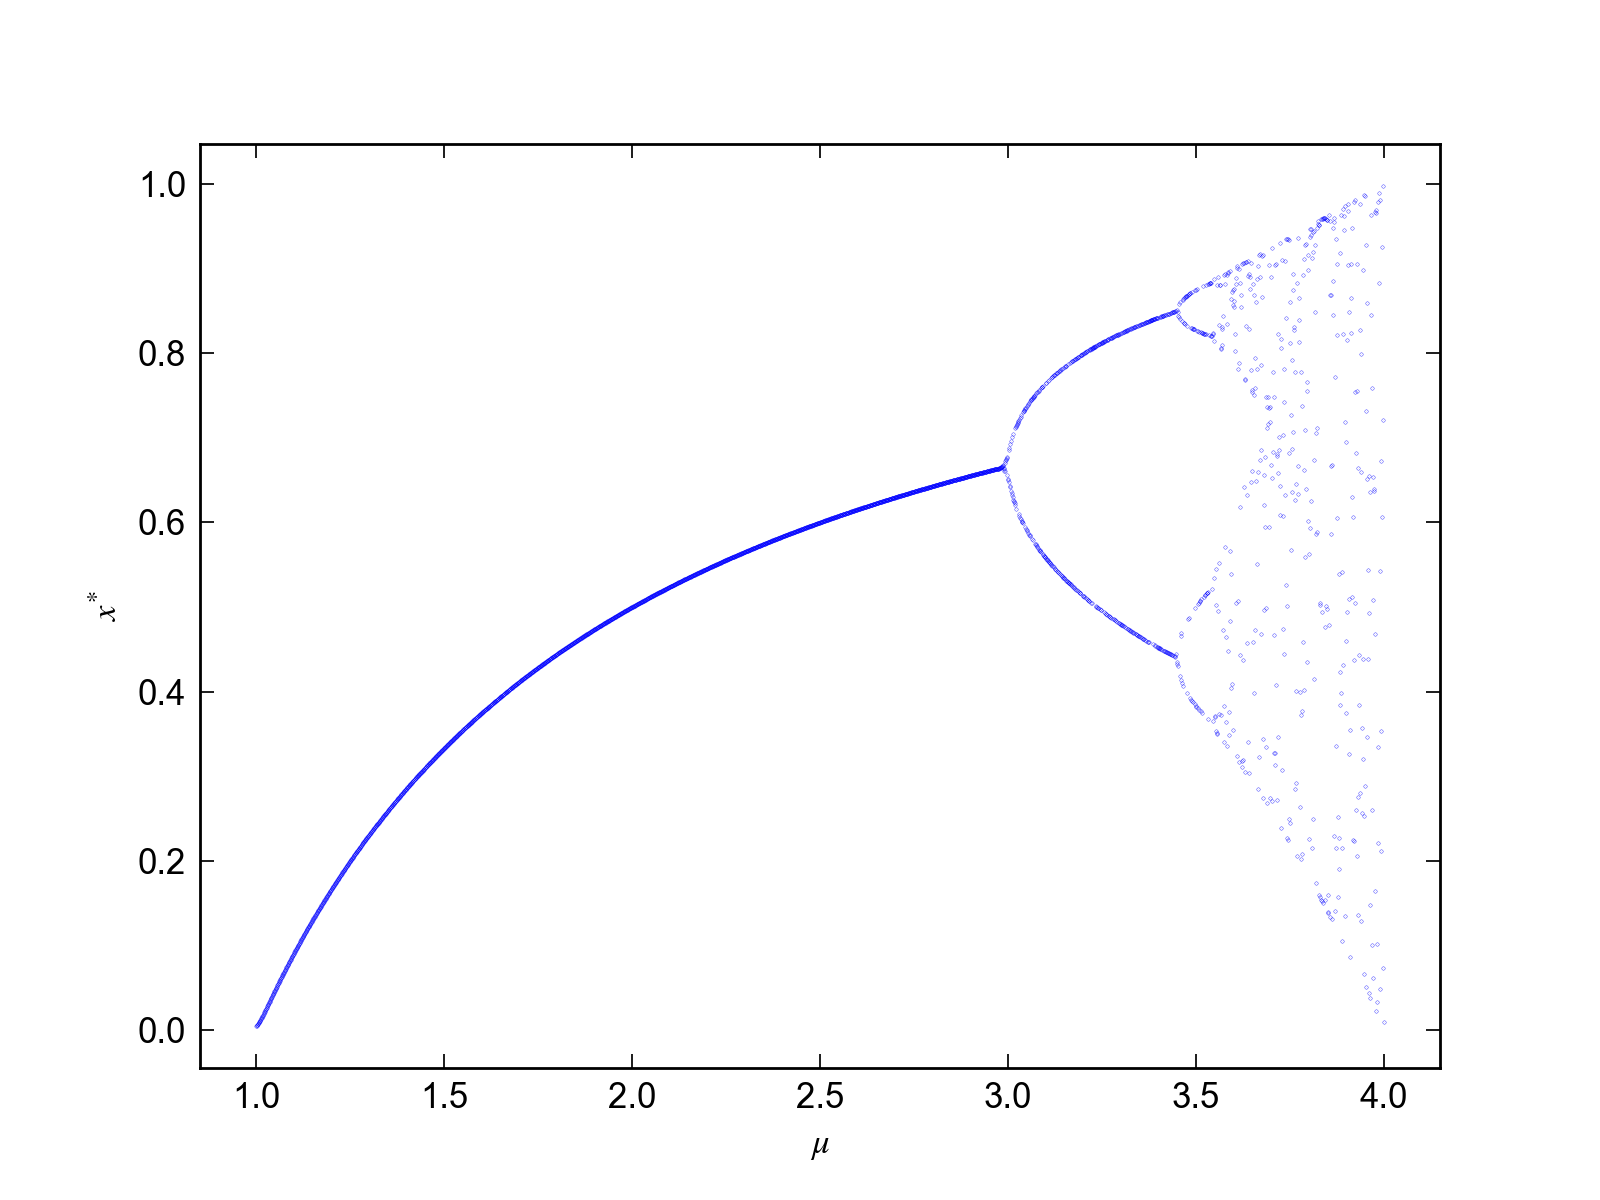

In [14]:
mu_min = 1.0
mu_max = 4.0
step = 0.001
plt.figure()
for mu in np.arange(mu_min, mu_max, step):
    x = logistic_map(mu, 200)
    #plt.plot(mu*np.ones_like(x[100:]),x[100:],'bo',markersize=0.1)
    plt.plot(mu,x[-1],'bo',markersize=0.1)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$x^{*}$')

## Summary

* We now get a feeling for why period doubling happens, the number of fixed points is increasing with μ!
* Also, we might expect many dynamical systems to have smooth Taylor expansions near their fixed points that have the same fundamental properties as the logistic map.  This is the origin of universality and the Feigenbaum-δ for deterministic chaos via period doubling.